In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy import integrate

## Definitions of the spatial grid boundaries

In [88]:
N = 2000  #number of points 
xmin = 3.5
xmax = 7.5 
h = ( xmax - xmin )/N  #step between two points
x = np.linspace(xmin,xmax, N)

## Definitions of constants

In [48]:
hbar= 1  #Planck constant 
m= 1  #Mass of the particul
V0 = -10  #definition of potential minimum

## Definition of the potentials we will use

In [49]:
# definition of the potential intervall 
binf=4
bsup=7

In [50]:
def Barriere(x):  #test potential in order to properly calibrate the numerov method

    V=[]
    
    for i in range(len(x)):
        
        if (x[i] <= binf or x[i] >= bsup):
        
            V.append(0)
            
        else:
            
            V.append(-V0)  #V0 < 0 so this potential corresponds to a barrier
    return V

## First potential, potential well

In [51]:
def V(x):

    V=[]
    
    for i in range(len(x)):
        
        if (x[i] <= binf or x[i] >= bsup):
        
            V.append(0)
            
        else:
            
            V.append(V0)
    
    
    ## def of the matchings points
    
    for i in range(len(V)):
        
        if (V[i]!= 0):
            
            L=i 
            
            break 
      
    for i in range(len(V)-1,0,-1):
        
        if (V[i]!= 0):
            
            R=i 
            
            break 
        
    MP=[L,R] 
    
    return V, MP    #returns a list containing two lists, 
                    #the first one corresponds to the value of the potential for each x,
                    #and the second list contains two values, corresponding to the two matching points

## Quadratic potential

In [52]:
def VQuad(x):

    V=[]
    
    Delta= (bsup-binf)/ 2
    E= (bsup+binf)/ 2
    
    
    for i in range(len(x)):
        
        if (x[i] < binf or x[i] > bsup):
        
            V.append(0)
            
        else:
            
            V.append( V0*( 1-  ((x[i]-E)/Delta)**2 ) ) 
    
    
    MP = len(V)/2  #def of the matching point
        
     
    
    return V, MP  #same comment as for the well  


## Lennard-Jones potential

In [53]:
def VLJ(x, sigma):  # sigma is a parameter to control the amplitude of the potential

    V=[]

    for i in range(len(x)):
       
    
            V.append(-48*V0*np.power(sigma, 12)/np.power(x[i], 13) + 24 *V0*np.power(sigma,6) /np.power(x[i], 7))  
    
    
    
    return V  #return the value of the potential of each value of x



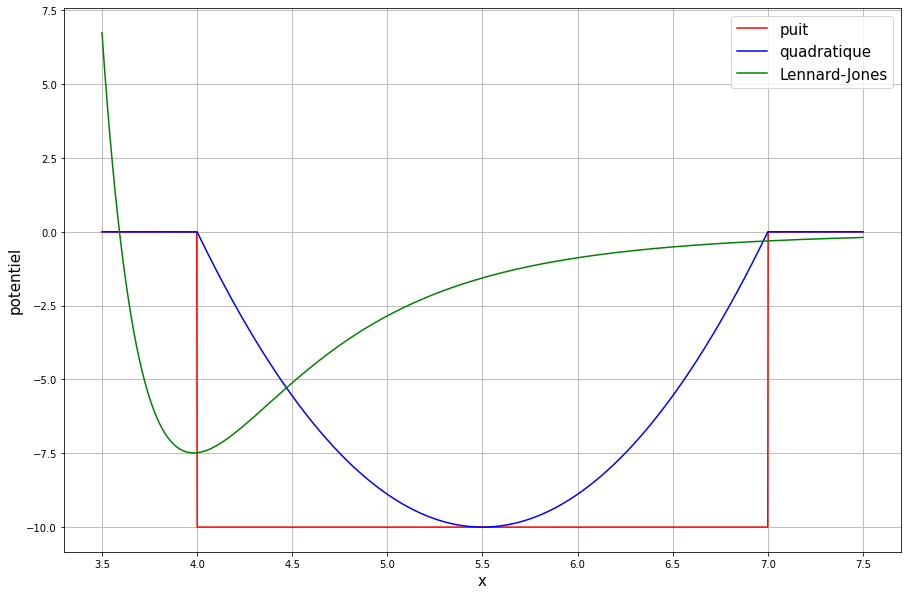

In [54]:
plt.figure(figsize=(15,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('potentiel',fontsize=15 )

plt.grid()


plt.plot(x,V(x)[0],  c="r", label='puit')
plt.plot(x,VQuad(x)[0],  c="b", label='quadratique')
plt.plot(r,VLJ(r, 3.2),  c="g", label='Lennard-Jones')


plt.legend(fontsize= 15)
plt.show()   


## Definition of the numerov method 

We want to solve $\dfrac{\text{d}^2\Psi(x)}{\text{d}x^2} + J(E,x)\Psi(x) = 0$ with $J(E,x) = \dfrac{2m(E-V(x))}{\hbar^2}$

In [68]:
def numerovL(h,V,E,MP): ## MP is the matching point L or R depending on what you want 
    
    J=[] 
    for i in range(len(V)):

        J.append(2*m*(E-V[i]/ hbar**2))

    f=np.zeros(len(J))
    f[0]=0
    f[1]= 0.001 
    
    for i in range(1,len(J)-1):
        
        f[i+1] = ((2 - 5 * h ** 2 / 6 * J[i]) * f[i] - (1 + h ** 2 / 12 * J[i-1]) * f[i-1]) / (1 + h ** 2 / 12 * J[i+1])
       
    fprimL= (f[MP+1] - f[MP-1]) /(2*h)
    
    return f, fprimL 

In [69]:
def numerovR(h,V,E,MP): 
    
    J=[]  
    for i in range(len(V)):

        J.append(2*m*(E-V[i]/ hbar**2 ) )

    f=np.zeros(len(J))
    f[len(J)-1]=0
    f[len(J)-2]= 0.001 
    
    for i in range(len(J)-2,0,-1):
        
        f[i-1] = ((2 - 5 * h ** 2 / 6 * J[i]) * f[i] - (1 + h ** 2 / 12 * J[i+1]) * f[i+1]) / (1 + h ** 2 / 12 * J[i-1])
    
    
    fprimR = (f[MP+1] - f[MP-1]) /(2*h)    
        
    return f , fprimR

#### Application of the match point method to obtain our modes

- we will use an iteration technique that allows us to zoom in to obtain more and more precise energy values. This is done with the objective of having the most accurate energy value to best describe the behaviour of the wave function by the numerov method 
- The aim to achieve this is to mimic the derivative of the function at the matching point for left and right numerov  

In [71]:
def AMP(V,h, MP):

    if (min(V) == max(V)):  ## particule dans une boite 
        E_test = np.linspace(min(V),10,1000)
    else:           
        E_test = np.linspace(min(V),max(V),5000)  ## Plus le nombre de point est élevés plus on aura de mode en sortie 
       
    E_solution = []  ## reset e_solution
    
    for k in range(1,2):
         
        
        if k==1: 
    
            for j in range(len(E_test)):

                numL= numerovL(h,V,E_test[j],MP)
                numR= numerovR(h,V,E_test[j],MP)

                if round(  numL[1]/numL[0][int(MP)], k) - round(numR[1]/numR[0][int(MP)], k) == 0 :  
                    E_solution.append(E_test[j])
        
        else: 
            
            for i in range(len(E_solution)):

                E_test=np.linspace(E_solution[i]-round(E_solution[i],k) ,E_solution[i]+round(E_solution[i],k), 1000 )

                for j in range(len(E_test)):

                    numL= numerovL(h,V,E_test[j],MP)
                    numR= numerovR(h,V,E_test[j],MP)


                    if round(numL[1]/numL[0][int(MP)], k+1) - round(numR[1]/numR[0][int(MP)], k+1) == 0 :  
                            #E_solution[i]=0
                            E_solution[i]=E_test[j]


            

                
        
    return E_solution
    
    
    
    
    
    
    
    

### Well potential

In [74]:
C = AMP(V(x)[0], h, V(x)[1][0])  #we recover the energy values for which the conditions on the derivatives are respected

In [75]:
C

[-9.581916383276655,
 -8.339667933586718,
 -8.337667533506702,
 -6.299259851970394,
 -6.297259451890378,
 -6.295259051810362,
 -6.293258651730346,
 -6.29125825165033,
 -3.4986997399479893,
 -3.4966993398679733,
 -3.4946989397879573,
 -3.4926985397079413,
 -3.4906981396279253,
 -3.4886977395479093,
 -3.4866973394678933,
 -3.4846969393878773,
 -3.4826965393078613,
 -0.016003200640128057,
 -0.01400280056011205,
 -0.012002400480096043,
 -0.010002000400080036,
 -0.008001600320064028,
 -0.006001200240048021,
 -0.004000800160032014,
 -0.002000400080016007,
 0.0]

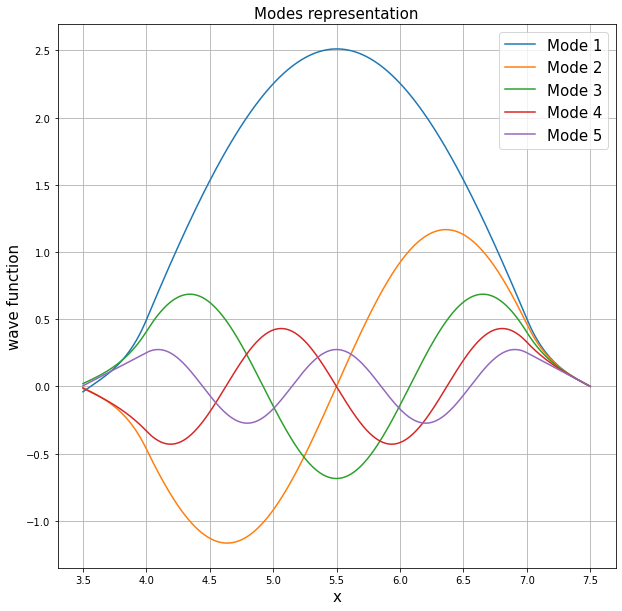

In [81]:
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],C[0],V(x)[1][0])[0], label='Mode 1' )
plt.plot(x,numerovR(h,V(x)[0],C[1],V(x)[1][0])[0], label='Mode 2' )
plt.plot(x,numerovR(h,V(x)[0],C[4],V(x)[1][0])[0], label='Mode 3' )
plt.plot(x,numerovR(h,V(x)[0],C[9],V(x)[1][0])[0], label='Mode 4' )
plt.plot(x,numerovR(h,V(x)[0],C[17],V(x)[1][0])[0], label='Mode 5')


plt.legend(fontsize= 15)
plt.show()   


### Quadratic potential

In [79]:
VQuad(x)[1]

1000.0

In [80]:
K=AMP(VQuad(x)[0], h, int(VQuad(x)[1]) ) 
K

[-8.553706936694708,
 -8.551706537504648,
 -8.549706138314589,
 -8.54770573912453,
 -8.54570533993447,
 -8.54370494074441,
 -8.54170454155435,
 -8.539704142364291,
 -8.537703743174232,
 -8.53570334398417,
 -8.533702944794111,
 -8.531702545604052,
 -8.529702146413992,
 -8.527701747223933,
 -8.525701348033873,
 -8.523700948843814,
 -8.521700549653755,
 -8.519700150463695,
 -8.517699751273636,
 -8.515699352083576,
 -8.513698952893517,
 -8.511698553703457,
 -8.509698154513398,
 -8.507697755323338,
 -8.505697356133279,
 -8.50369695694322,
 -8.50169655775316,
 -8.499696158563099,
 -8.49769575937304,
 -8.49569536018298,
 -8.49369496099292,
 -8.491694561802861,
 -8.489694162612802,
 -8.487693763422742,
 -8.485693364232683,
 -8.483692965042623,
 -8.481692565852564,
 -8.479692166662504,
 -8.477691767472445,
 -8.475691368282385,
 -8.473690969092326,
 -8.471690569902265,
 -8.469690170712205,
 -8.467689771522146,
 -8.465689372332086,
 -8.463688973142027,
 -2.5825153543669,
 -2.5805149551768407,
 -2

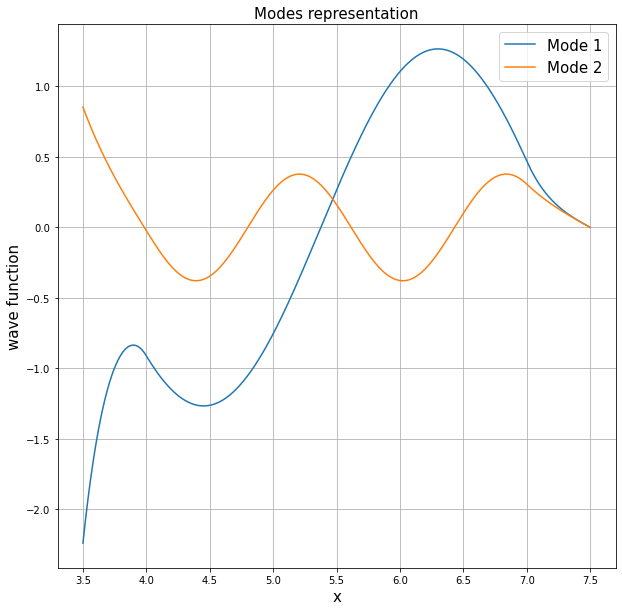

In [87]:
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],K[0],V(x)[1][0])[0], label='Mode 1' )
plt.plot(x,numerovR(h,V(x)[0],K[52],V(x)[1][0])[0], label='Mode 2' )


plt.legend(fontsize= 15)
plt.show()   


## Scalar product compliance test 

In [82]:
trapeze= integrate.trapz( numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0] * numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0] ,x, h) 
trapeze

0.010152379153544278

In [83]:
trapeze= integrate.trapz( numerovR (h,V(x)[0],C[3],V(x)[1][0]) [0] * numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0] ,x, h) 
trapeze

0.827893904755181

#### Normalisation 

In [85]:
 
Nor=[]
   
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0],x,h)       )    
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[9],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[9],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[17],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[17],V(x)[1][0]) [0],x,h)       )

Nor

[10.846879219011385,
 2.359894870570713,
 0.8273342350483821,
 0.33313903579484494,
 0.1398333929307493]

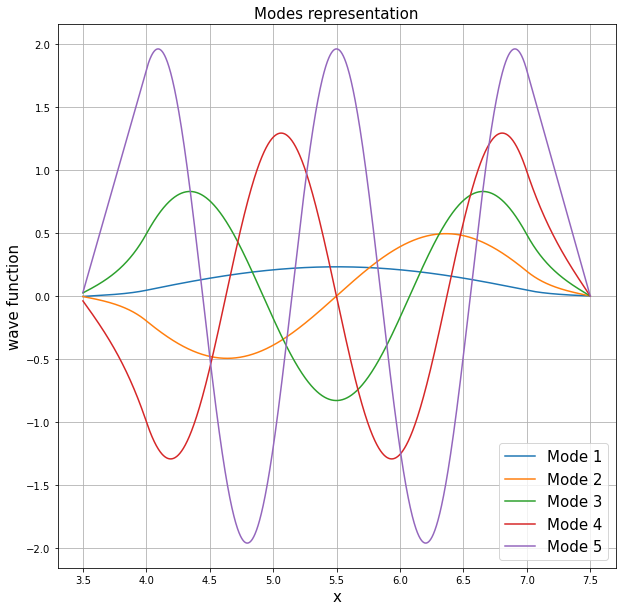

In [86]:
#plt.plot(x,V(x)[0])
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],C[0],V(x)[1][0])[0]/Nor[0]  , label='Mode 1' )

plt.plot(x,numerovR(h,V(x)[0],C[1],V(x)[1][0])[0]/Nor[1] , label='Mode 2' )

plt.plot(x,numerovR(h,V(x)[0],C[4],V(x)[1][0])[0]/Nor[2]  , label='Mode 3' )

plt.plot(x,numerovR(h,V(x)[0],C[9],V(x)[1][0])[0]/Nor[3]  , label='Mode 4' )

plt.plot(x,numerovR(h,V(x)[0],C[17],V(x)[1][0])[0]/Nor[4]  , label='Mode 5')


plt.legend(fontsize= 15)
plt.show()   